# Model 5:

### Target: 

- Add Image Augmentation techniques - `RandomRotation` (5-7 degrees should be sufficient). 

### Results:

- Parameters: 7,448
- Best Training Accuracy: 98.60
- Best Test Accuracy: 99.04

### Analysis:

- Need to add an LR Scheduler to stabilise test loss.
- Image augmentation shows some improvement w.r.t. test accuracy.


# Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import warnings
warnings.filterwarnings("ignore")

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.

In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
from utils import load_data

train, test = load_data(train_transforms, test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


# The model
Let's import our model from `model.py` file

In [5]:
from model import Model5 as Net

# Model Params
Can't emphasize on how important viewing Model Summary is.
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [6]:
# !pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
       BatchNorm2d-2            [-1, 8, 26, 26]              16
              ReLU-3            [-1, 8, 26, 26]               0
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
       BatchNorm2d-6           [-1, 16, 24, 24]              32
              ReLU-7           [-1, 16, 24, 24]               0
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             128
      BatchNorm2d-10            [-1, 8, 24, 24]              16
             ReLU-11            [-1, 8, 24, 24]               0
          Dropout-12            [-1, 8, 24, 24]               0
        MaxPool2d-13            [-1, 8, 12, 12]               0
           Conv2d-14           [-1

# Training and Testing
Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs.

Let's import our model from `model.py` file

In [7]:
from model import train, test

# Let's Train and test our model

In [8]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
    test(model, device, test_loader, test_losses, test_acc)

EPOCH: 0


Loss=0.1146845892071724 Batch_id=468 Accuracy=83.00: 100%|███████████████████████████| 469/469 [00:06<00:00, 74.08it/s]



Test set: Average loss: 0.1217, Accuracy: 9671/10000 (96.71%)

EPOCH: 1


Loss=0.08922851085662842 Batch_id=468 Accuracy=96.81: 100%|██████████████████████████| 469/469 [00:06<00:00, 75.42it/s]



Test set: Average loss: 0.0862, Accuracy: 9739/10000 (97.39%)

EPOCH: 2


Loss=0.07814667373895645 Batch_id=468 Accuracy=97.42: 100%|██████████████████████████| 469/469 [00:06<00:00, 75.27it/s]



Test set: Average loss: 0.0537, Accuracy: 9840/10000 (98.40%)

EPOCH: 3


Loss=0.10497228056192398 Batch_id=468 Accuracy=97.74: 100%|██████████████████████████| 469/469 [00:06<00:00, 75.48it/s]



Test set: Average loss: 0.0572, Accuracy: 9820/10000 (98.20%)

EPOCH: 4


Loss=0.06638053804636002 Batch_id=468 Accuracy=97.96: 100%|██████████████████████████| 469/469 [00:06<00:00, 75.42it/s]



Test set: Average loss: 0.0493, Accuracy: 9847/10000 (98.47%)

EPOCH: 5


Loss=0.08699574321508408 Batch_id=468 Accuracy=98.09: 100%|██████████████████████████| 469/469 [00:06<00:00, 74.58it/s]



Test set: Average loss: 0.0419, Accuracy: 9870/10000 (98.70%)

EPOCH: 6


Loss=0.038558680564165115 Batch_id=468 Accuracy=98.27: 100%|█████████████████████████| 469/469 [00:06<00:00, 73.60it/s]



Test set: Average loss: 0.0375, Accuracy: 9879/10000 (98.79%)

EPOCH: 7


Loss=0.03814719244837761 Batch_id=468 Accuracy=98.23: 100%|██████████████████████████| 469/469 [00:06<00:00, 74.89it/s]



Test set: Average loss: 0.0423, Accuracy: 9873/10000 (98.73%)

EPOCH: 8


Loss=0.04470350965857506 Batch_id=468 Accuracy=98.39: 100%|██████████████████████████| 469/469 [00:06<00:00, 72.95it/s]



Test set: Average loss: 0.0407, Accuracy: 9875/10000 (98.75%)

EPOCH: 9


Loss=0.056033384054899216 Batch_id=468 Accuracy=98.37: 100%|█████████████████████████| 469/469 [00:06<00:00, 73.74it/s]



Test set: Average loss: 0.0435, Accuracy: 9859/10000 (98.59%)

EPOCH: 10


Loss=0.03592042997479439 Batch_id=468 Accuracy=98.50: 100%|██████████████████████████| 469/469 [00:06<00:00, 70.21it/s]



Test set: Average loss: 0.0351, Accuracy: 9893/10000 (98.93%)

EPOCH: 11


Loss=0.03317892923951149 Batch_id=468 Accuracy=98.43: 100%|██████████████████████████| 469/469 [00:06<00:00, 74.77it/s]



Test set: Average loss: 0.0396, Accuracy: 9879/10000 (98.79%)

EPOCH: 12


Loss=0.022747889161109924 Batch_id=468 Accuracy=98.56: 100%|█████████████████████████| 469/469 [00:06<00:00, 74.83it/s]



Test set: Average loss: 0.0326, Accuracy: 9904/10000 (99.04%)

EPOCH: 13


Loss=0.008651266805827618 Batch_id=468 Accuracy=98.59: 100%|█████████████████████████| 469/469 [00:06<00:00, 73.40it/s]



Test set: Average loss: 0.0390, Accuracy: 9883/10000 (98.83%)

EPOCH: 14


Loss=0.020360419526696205 Batch_id=468 Accuracy=98.60: 100%|█████████████████████████| 469/469 [00:06<00:00, 75.09it/s]



Test set: Average loss: 0.0340, Accuracy: 9901/10000 (99.01%)



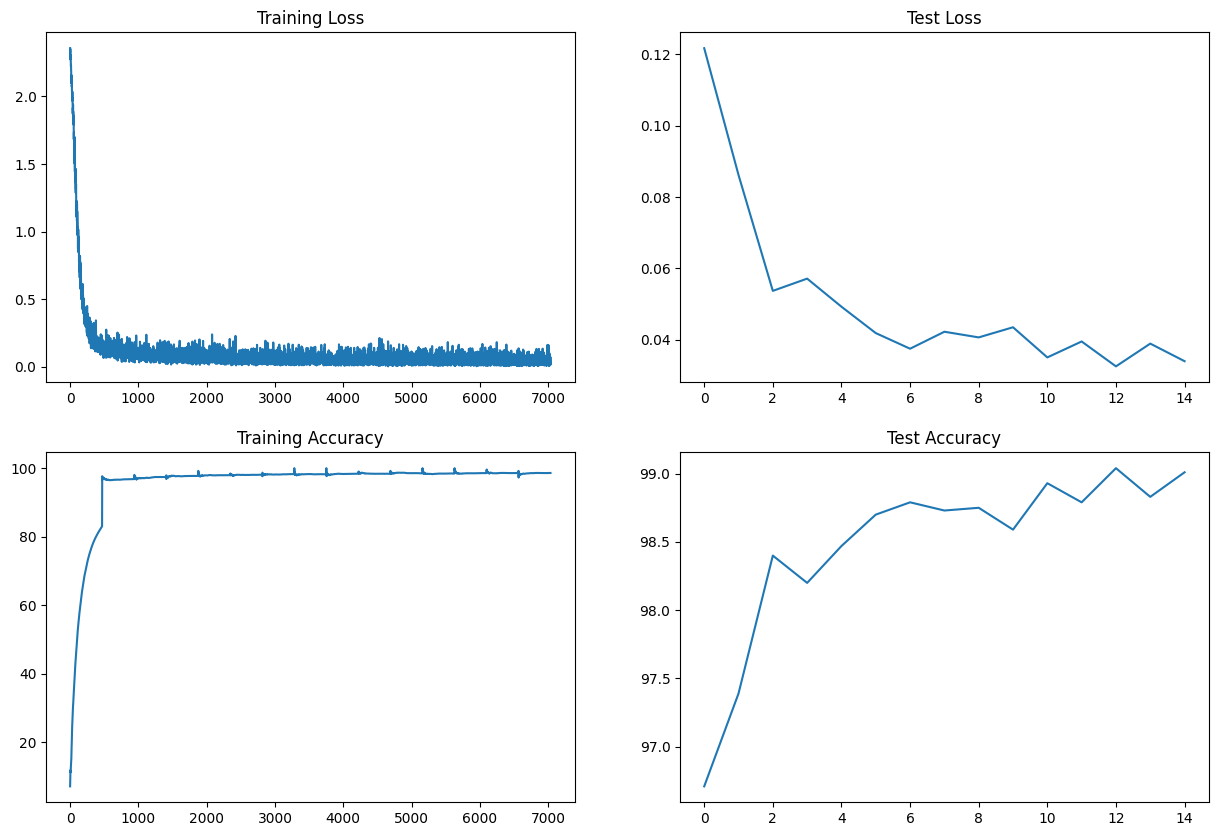

In [9]:
from utils import plot_graphs

plot_graphs(train_acc, train_losses, test_acc, test_losses)